# AV ML Hiring Hackathon

Analytics Vidhya Machine Learning Hiring Hackathon 2019

Load Prediction Analysis in Python using sklearn package

https://satya-python.blogspot.com/

Jupyter Notebook in Google Colab

In [0]:
# Importing required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.decomposition import PCA

# Loading Data

In [4]:
# For Google Colaboratory and Google Drive
from google.colab import files,drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Analytics\ Vidhya/ml-hiring-hackathon

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Analytics Vidhya/ml-hiring-hackathon


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_loan_ids = test["loan_id"]

# EDA - Exploratory Data Analysis

In [6]:
# check number of features and data points in train and test
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 116058
Number of features in train: 29
Number of data points in test: 35866
Number of features in test: 28


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [8]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [9]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train['origination_date'] = pd.to_datetime(train['origination_date'], format='%Y-%m-%d')
train['first_payment_date'] = pd.to_datetime(train['first_payment_date'], format='%m/%Y')
test['origination_date'] = pd.to_datetime(test['origination_date'], format='%d/%m/%y')
test['first_payment_date'] = pd.to_datetime(test['first_payment_date'], format='%b-%y')

In [11]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [12]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,2012-02-01,2012-04-01,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,2012-02-01,2012-04-01,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,2012-01-01,2012-03-01,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,2012-02-01,2012-04-01,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,2012-02-01,2012-04-01,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null datetime64[ns]
first_payment_date          35866 non-null datetime64[ns]
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 n

In [14]:
# Checking for NULL/missing values
train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [15]:
# Checking for NULL/missing values
test.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

0    115422
1       636
Name: m13, dtype: int64
0    99.451998
1     0.548002
Name: m13, dtype: float64



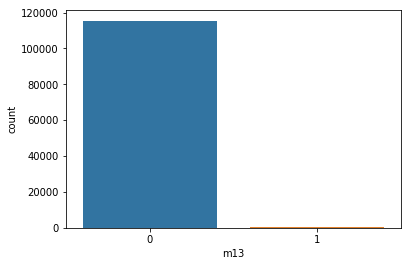

In [16]:
print(train['m13'].value_counts())
print(train['m13'].value_counts(normalize=True)*100)
print()
sns.countplot(train["m13"])

In [17]:
train.source.value_counts().sort_index()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [18]:
train.financial_institution.value_counts().sort_index()

Anderson-Taylor                  483
Browning-Hart                  31852
Chapman-Mcmahon                  388
Cole, Brooks and Vincent        1642
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
OTHER                          49699
Richards-Walters                1459
Richardson Ltd                   473
Romero, Woods and Johnson        750
Sanchez, Hays and Wilkerson      853
Sanchez-Robinson                1193
Suarez Inc                      1790
Swanson, Newton and Miller      6874
Taylor, Hunt and Rodriguez      1259
Thornton-Davis                   651
Turner, Baldwin and Rhodes      1846
Name: financial_institution, dtype: int64

In [0]:
train['number_of_borrowers'] = train['number_of_borrowers'].astype('int64')
train['debt_to_income_ratio'] = train['debt_to_income_ratio'].astype('int64')
train['borrower_credit_score'] = train['borrower_credit_score'].astype('int64')
train['insurance_percent'] = train['insurance_percent'].astype('int64')
train['co-borrower_credit_score'] = train['co-borrower_credit_score'].astype('int64')
train['insurance_type'] = train['insurance_type'].astype('int64')

In [20]:
train.number_of_borrowers.value_counts().sort_index()

1    47214
2    68844
Name: number_of_borrowers, dtype: int64

In [21]:
train.insurance_type.value_counts().sort_index()

0    115680
1       378
Name: insurance_type, dtype: int64

In [22]:
train.loan_purpose.value_counts().sort_index()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

# Preparing Data

In [0]:
# train['origination_date_quarter'] = train['origination_date'].dt.quarter
# train['origination_date_day'] = train['origination_date'].dt.day
# train['origination_date_Dayofweek'] = train['origination_date'].dt.dayofweek
# train['origination_date_Dayweek'] = train['origination_date'].dt.weekday_name
# train['origination_date_is_weekend'] = np.where(train['origination_date'].dt.dayofweek.isin(['Sunday', 'Saturday']), 1,0)

# test['origination_date_quarter'] = test['origination_date'].dt.quarter
# test['origination_date_day'] = test['origination_date'].dt.day
# test['origination_date_Dayofweek'] = test['origination_date'].dt.dayofweek
# test['origination_date_Dayweek'] = test['origination_date'].dt.weekday_name
# test['origination_date_is_weekend'] = np.where(test['origination_date'].dt.dayofweek.isin(['Sunday', 'Saturday']), 1,0)

In [24]:
str_cols= train.loc[:, train.dtypes=='object'].columns.tolist()
str_cols

['source', 'financial_institution', 'loan_purpose']

In [0]:
# One Hot Encoding
train = pd.get_dummies(train, columns=str_cols, drop_first=True)
test = pd.get_dummies(test, columns=str_cols, drop_first=True)

In [26]:
train.sample(5)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86
18237,427959594646,3.300,170000,180,2012-01-01,2012-02-01,50,2,27,805,0,809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
89969,558734027711,4.125,277000,360,2012-03-01,2012-04-01,85,1,40,797,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36919,453004855545,3.875,172000,360,2012-02-01,2012-04-01,75,2,21,752,0,777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
42259,828368965709,4.250,290000,360,2012-01-01,2012-03-01,80,2,26,773,0,749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
63631,982741824549,3.375,102000,96,2012-01-01,2012-04-01,41,2,36,722,0,734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
test.sample(5)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,source_Y,source_Z,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86
11140,11141,4.750,100000,360,2012-01-01,2012-03-01,80,1,30,659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6041,6042,3.875,388000,360,2012-03-01,2012-05-01,55,1,39,777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
29960,29961,4.250,95000,360,2012-01-01,2012-03-01,76,2,25,797,0,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
19093,19094,4.500,75000,360,2012-02-01,2012-04-01,75,2,33,787,0,785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29557,29558,5.125,52000,360,2012-01-01,2012-03-01,80,2,26,802,0,804,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# train['debt_to_income_ratio'] = np.log(train['debt_to_income_ratio'])
# test['debt_to_income_ratio'] = np.log(test['debt_to_income_ratio'])
# train['unpaid_principal_bal'] = np.log(train['unpaid_principal_bal'])
# test['unpaid_principal_bal'] = np.log(test['unpaid_principal_bal'])

In [29]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = train.corr()['m13'].sort_values()

# most negative correlations
print(correlations_data.head(10))
print()

# most positive correlations
print(correlations_data.tail(10))

borrower_credit_score                               -0.094215
co-borrower_credit_score                            -0.042651
number_of_borrowers                                 -0.039979
unpaid_principal_bal                                -0.017120
financial_institution_Sanchez-Robinson              -0.006408
financial_institution_Suarez Inc                    -0.004555
financial_institution_Chapman-Mcmahon               -0.004299
financial_institution_Sanchez, Hays and Wilkerson   -0.003654
financial_institution_Taylor, Hunt and Rodriguez    -0.003267
financial_institution_Richards-Walters              -0.003138
Name: m13, dtype: float64

m4     0.218956
m5     0.259529
m6     0.287712
m7     0.309072
m8     0.339362
m10    0.367840
m9     0.369138
m11    0.410213
m12    0.466442
m13    1.000000
Name: m13, dtype: float64


In [0]:
train.drop(["loan_id","origination_date","first_payment_date"], axis=1, inplace=True)
test.drop(["loan_id","origination_date","first_payment_date"], axis=1, inplace=True)

In [0]:
# # Balancing data based on target variable
# y_1 = train[train['m13'] == 1]
# y_0 = train[train['m13'] == 0].sample(n=len(y_1)+ 55000, random_state=123)    ## chosing 50% of 0's
# data = y_1.append(y_0)
# print(data['m13'].value_counts())
# print(data['m13'].value_counts(normalize=True)*100)
# train2 = data.drop('m13', axis=1)
# target = data['m13']

In [32]:
train2 = train.drop(['m13'], axis=1)
target = train["m13"]
print(train['m13'].value_counts(normalize=True)*100)
print("\n train2 shape:", train2.shape)

0    99.451998
1     0.548002
Name: m13, dtype: float64

 train2 shape: (116058, 44)


In [0]:
train2 = train2.loc[:, test.columns]

In [34]:
train2.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,source_Y,source_Z,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1,22,694,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,4.875,144000,360,72,1,44,697,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3.250,366000,180,49,1,33,780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,4.750,135000,360,46,2,44,633,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4.750,124000,360,80,1,43,681,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
# Using SMOTE for Balancing Data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2019)
train2, target = sm.fit_sample(train2, target.ravel())
print (sum(target==0))
print (sum(target==1))
sum(target==1)

115422
115422


115422

In [36]:
print(train2.shape, target.shape)

(230844, 44) (230844,)


In [0]:
# Scaling Data
scaler = StandardScaler()
train2 = scaler.fit_transform(train2)
test = scaler.transform(test)

# train2 = pd.DataFrame(scaler.fit_transform(train2), columns=train2.columns)
# test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [38]:
poly = PolynomialFeatures(degree=2)
train2 = poly.fit_transform(train2)
test = poly.transform(test)
poly
print("train2 shape:", train2.shape)

# # train2 shape: (14272, 44)

train2 shape: (230844, 1035)


In [0]:
pca = PCA(random_state=2019)
train2 = pca.fit_transform(train2)
test = pca.transform(test)
pca

In [0]:
train2

In [0]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2019)
print(x_train.shape, x_val.shape)

In [0]:
x_train

In [0]:
x_val

In [0]:
y_train

In [0]:
y_val

# Machine Learning Algorithms

In [0]:
# # Logistic Regression
# for c in [0.1, 1, 5, 100]:
#     lr = LogisticRegression(random_state=2019, C=c).fit(x_train, y_train)
#     print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val))))
    
# # F1 score for C=0.1: 0.9849064315534406
# # F1 score for C=1: 0.9893558237603606
# # F1 score for C=5: 0.9887545643666622
# # F1 score for C=100: 0.9912902101962606

In [0]:
# clf_log = LogisticRegression(random_state=2019, C=100).fit(x_train, y_train)
# clf_log

In [0]:
# y_pred_val = clf_log.predict(x_val)
# print(f1_score(y_val, y_pred_val))
# print(f1_score(y_val, y_pred_val, average='macro'))
# print(f1_score(y_val, y_pred_val, average='micro'))
# print(f1_score(y_val, y_pred_val, average='weighted'))
# # 0.6567901234567902
# # 0.8228848738270236
# # 0.9786449531418037
# # 0.9758124877414203

In [0]:
# # Confusion Matrix
# cm = confusion_matrix(y_val, y_pred_val).T
# cm = cm.astype('float')/cm.sum(axis=0)
# ax = sns.heatmap(cm, annot=True, cmap='Blues');
# ax.set_xlabel('True Label',size=12)
# ax.set_ylabel('Predicted Label',size=12)

In [0]:
# #clf_log.fit(train2, target)
# y_pred = clf_log.predict(test)
# y_pred

In [0]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state = 2019).fit(x_train, y_train)
rf

In [0]:
y_val_pred_rf = rf.predict(x_val)
print(f1_score(y_val, y_val_pred_rf))
print(f1_score(y_val, y_val_pred_rf, average='macro'))
print(f1_score(y_val, y_val_pred_rf, average='micro'))
print(f1_score(y_val, y_val_pred_rf, average='weighted'))
# 0.6886792452830189
# 0.8390998639879685
# 0.9797235023041475
# 0.9775977424084705

In [0]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred_rf).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

In [0]:
y_pred_rf = rf.predict(test)
y_pred_rf

In [0]:
submission = {}
submission['loan_id'] = test_loan_ids
submission['m13'] = y_pred_rf
#submission['m13'] = y_pred
submission = pd.DataFrame(submission)
submission = submission[['loan_id', 'm13']]
submission.to_csv("submission.csv", index=False)
print(submission['m13'].value_counts())

In [0]:
!pwd; ls -ltr

In [0]:
files.download('submission.csv')

In [0]:
# from sklearn.model_selection import cross_val_score

# # Function to calculate mean absolute error
# def cross_val(x_train, y_train, model):
#     # Applying k-Fold Cross Validation
#     accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
#     return accuracies.mean()

# # Takes in a model, trains the model, and evaluates the model on the validation set
# def fit_and_evaluate(model):
    
#     # Train the model
#     model.fit(x_train, y_train)
    
#     # Make predictions and evalute
#     model_pred = model.predict(x_val)
#     model_cross = cross_val(x_train, y_train, model)
    
#     # Return the performance metric
#     return model_cross

In [0]:
# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# naive = GaussianNB()
# naive_cross = fit_and_evaluate(naive)
# print('Naive Bayes Performance on validation set: Cross Validation Score = %0.4f' % naive_cross)


In [0]:
# # Random Forest Classification
# random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# random_cross = fit_and_evaluate(random)

# print('Random Forest Performance on validation set: Cross Validation Score = %0.4f' % random_cross)

In [0]:
# # Gradiente Boosting Classification
# from xgboost import XGBClassifier
# #gb = XGBClassifier()
# gb = XGBClassifier(objective="binary:logistic", learning_rate=0.03, n_estimators=500, max_depth=1, subsample=0.4, random_state=123)
# gb_cross = fit_and_evaluate(gb)

# print('Gradiente Boosting Classification Performance on validation set: Cross Validation Score = %0.4f' % gb_cross)
# #Gradiente Boosting Classification Performance on validation set: Cross Validation Score = 0.9959

In [0]:
# # LogisticRegression
# lg = LogisticRegression()
# lg_cross = fit_and_evaluate(lg)

# print('LogisticRegression Performance on validation set: Cross Validation Score = %0.4f' % lg_cross)

In [0]:
# # SVM
# from sklearn.svm import SVC
# svm = SVC()
# svm_cross = fit_and_evaluate(svm)

# print('SVM Performance on validation set: Cross Validation Score = %0.4f' % svm_cross)

In [0]:
# import statsmodels.api as sm
# glm = sm.GLM(y_train, x_train, sm.families.Binomial())

# results = glm.fit()

# print(roc_auc_score(y_val, results.predict(x_val)))